# Forecasting Resturant Profitability

### Project Overview:

The objective of this project is to analyze the provided dataset of existing restaurant locations to determine the most influential factors contributing to profitability. The goal is to develop a predictive model that can forecast third-year profits with at least 75% accuracy, enabling informed decisions on new location openings.

### Project Aim:

To utilize data analysis and modeling techniques to:
 - Identify the key factors driving profitability in restaurant locations.
 - Develop a predictive model to determine whether a new location will achieve positive third-year profits with 75% accuracy.
 - Provide actionable recommendations for improving the success rate of new restaurant locations.

### Deliverables:

 - A written report detailing the analysis, methodology, and findings.
 - Reviewable code used for analysis.
 - A presentation summarizing key findings and recommendations for the strategy team.

### Data Description

We have spent considerable effort obtaining accurate information about our current restaurant locations, including data such as the number of nearby competitors and the travel time to the nearest highway.

We aim for all of our locations to be open 24 hours and to have drive-through service, but this is often not possible due to local conditions or regulations. When franchise operators suggest new locations they are asked to submit the form shown below.

 > Location (street address)

 > Is there another family grill house within 5 miles? Yes/No

 > What is the estimated distance to the nearest competitor restaurant?

 > Is the location directly on a highway? Yes/No

 >Is the location in a residential or business district? Residential/Business

 >Can the store remain open 24hrs? Yes/No

 >Would takeaway and/or delivery services be offered? Yes/No

 >Would drivethru be possible? Yes/No

 >Would you be prepared to manage the location once open? Yes/No
 
 >What would be a unique feature of this location/restaurant that would attract customers?


### Columns
- `location` - Discrete. Unique identifier for the restaurant.

-  **`year_3_profit` - Nominal. 1 if profitable after 3 years, 0 otherwise.**  ==*target variable*==

- `local_pop` - Discrete. Population within 30 minutes of travel to the restaurant. Any positive integer.

- `competitors` - Discrete. Number of competitor restaurants within 2 kilometers. Any positive integer.

- `nearest_fgh` - Continuous. Distance in kilometers to the nearest other Family Grill House location. Any positive value.

- `hours` - Ordinal. One of "Regular", "Extended", or "24 hours".

- `highway` - Discrete. Travel time in minutes to the nearest highway. Should be at least 1 minute.

- `drivethru` - Ordinal. Whether the location has a drive-through order and collection service ("Yes" or "No").

# Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Setting the visualization settings
%pwd

'/Users/dhruv/PROJECTS/Kaggle_Projects/Forecasting-Restaurant-Profitability/notebook'

In [4]:
os.chdir('../')

In [5]:
%pwd

'/Users/dhruv/PROJECTS/Kaggle_Projects/Forecasting-Restaurant-Profitability'

In [6]:
from resturant_forecasting.utils import main_utils
main_utils.set_visualization_settings()

### Training Data

In [7]:
df = pd.read_csv('./notebook/restaurant_success.csv')

In [8]:
df.columns

Index(['location', 'year_3_profit', 'local_pop', 'competitors', 'nearest_fgh',
       'hours', 'highway', 'drivethru'],
      dtype='object')

In [9]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-----------------')

location
[38195 12324 79567 ... 14249 91866 97464]
-----------------
year_3_profit
[1 0]
-----------------
local_pop
['125567' '105571' '104591' ... '231969' '53674' '157215']
-----------------
competitors
[0 1]
-----------------
nearest_fgh
[ 6.4  5.3  6.3  6.   4.5  7.6  7.2  6.8 33.5 15.9  6.9  6.2  5.8 41.6
  7.1  8.1  5.5  5.   6.7  4.4 17.4  7.   4.   5.4  4.6  6.6  5.6  9.3
  7.4 15.   7.9  5.1  7.7  5.9  4.7  7.5 55.6 12.9  5.2  7.3  5.7 30.7
  7.8  4.8  4.9  4.2 48.5 11.9 17.5 50.   6.5  9.7 12.2  8.   4.1  8.2
 19.8 15.1 13.5  6.1 13.3 39.7 22.3  4.3  8.7 29.8 22.6  8.3 11.3 12.8
 12.7 11.7  8.6 16.4 44.5 10.8 37.   9.9 30.  14.3 18.9  9.2 11.8 41.
 11.6 10.  19.2 23.9 12.5 22.2 18.2 18.5 10.9 16.3 13.   9.4 12.3 13.1
 40.7  8.4 10.7 11.  24.5 60.  23.1 10.4 59.1 12.4 23.3 24.7 19.7 66.2
 17.6 11.5 21.6 15.6 11.4 14.5 31.3 16.9 13.2  8.8  9.1 30.3  8.9 24.1
 10.6  9.5 19.9 47.4 14.9 17.9 27.8 21.7 54.2 33.7 43.3 76.7 16.6 51.4
 12.1 35.4  9.8 25.2 53.  22.5 13.4 21.1 21.4 44.

In [10]:
main_utils.initial_analysis(df)


 The shape of the dataset:(1090, 8)

 Number of columns in the dataset:8

 Number of rows in the dataset:1090

 Data types in the dataset :
 
location           int64
year_3_profit      int64
local_pop         object
competitors        int64
nearest_fgh      float64
hours             object
highway            int64
drivethru         object
dtype: object
*********************************************
 Number of Numerical Features : 5

 Number of Categorical Features : 3
Numerical Features: 
 Index(['location', 'year_3_profit', 'competitors', 'nearest_fgh', 'highway'], dtype='object')
Categorical Features: 
 Index(['local_pop', 'hours', 'drivethru'], dtype='object')
****************************************
 Number of missing values :
 
location           0
year_3_profit      0
local_pop          0
competitors        0
nearest_fgh        0
hours            109
highway            0
drivethru          0
dtype: int64
****************************************

**The dataset has 0 duplicate row

<function resturant_forecasting.utils.main_utils.initial_analysis(dataset)>

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [13]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

local_pop
Unknown    4.954128
125567     0.091743
118510     0.091743
89372      0.091743
116334     0.091743
             ...   
46986      0.091743
224420     0.091743
274222     0.091743
139306     0.091743
157215     0.091743
Name: proportion, Length: 1037, dtype: float64
---------------------------
hours
Extended    49.745158
24 hours    31.294597
Regular     18.960245
Name: proportion, dtype: float64
---------------------------
drivethru
Yes             51.926606
No              43.119266
No drivethru     4.954128
Name: proportion, dtype: float64
---------------------------


#### Observations recorded during the intitial analysis of the data

 1. `local_pop` is of data type `object`, which needs to convert to the `int`. There are 54 *Unkown* in the columns which needs to be checked.

 2. There are 109 missing values (nan) in `hours` column which needs to be handle.

 3. In the `drivethru` column field are not normalized across all the observation, need to fix that before moving further.

 4. There are negative values in the `highway` columns which needs to be corrected.

In [28]:
# replacing the unknown values with nan
df['local_pop']=df['local_pop'].replace('Unknown', np.nan)

In [31]:
# converting the object columns to integer
df['local_pop']=df['local_pop'].astype('float')

In [33]:
# replacing the nan values with the mean
df['local_pop']=df['local_pop'].fillna(df['local_pop'].mean())

In [34]:
# converting float to int
df['local_pop']=df['local_pop'].astype('int')

In [38]:
df[df['hours'].isnull()].head()

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru
2,79567,0,104591,0,6.3,NaN,6,No
5,38255,1,197654,0,7.6,NaN,5,Yes
8,20900,1,175574,0,6.8,NaN,4,Yes
13,58536,1,257539,0,5.8,NaN,1,Yes
24,91694,1,42702,1,7.0,NaN,2,Yes


In [39]:
## Replacing the missing values with Unknown
df['hours']=df['hours'].fillna('Not Known')

In [40]:
df.hours.value_counts()

hours
Extended     488
24 hours     307
Regular      186
Not Known    109
Name: count, dtype: int64

In [41]:
df.drivethru.value_counts()

drivethru
Yes             566
No              470
No drivethru     54
Name: count, dtype: int64

In [42]:
# replacing the No drivethru with No
df['drivethru']=df['drivethru'].replace('No drivethru', 'No')

In [43]:
df.drivethru.value_counts()

drivethru
Yes    566
No     524
Name: count, dtype: int64

In [46]:
df[df['highway']<0].head()

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru


In [45]:
# converting the negative values to positive
df['highway']=df['highway'].abs()

In [78]:
df['year_3_profit']=df['year_3_profit'].astype('O')
df['competitors']=df['competitors'].astype('O')

In [79]:
main_utils.initial_analysis(df)


 The shape of the dataset:(1090, 8)

 Number of columns in the dataset:8

 Number of rows in the dataset:1090

 Data types in the dataset :
 
location           int64
year_3_profit     object
local_pop          int64
competitors       object
nearest_fgh      float64
hours             object
highway            int64
drivethru         object
dtype: object
*********************************************
 Number of Numerical Features : 4

 Number of Categorical Features : 4
Numerical Features: 
 Index(['location', 'local_pop', 'nearest_fgh', 'highway'], dtype='object')
Categorical Features: 
 Index(['year_3_profit', 'competitors', 'hours', 'drivethru'], dtype='object')
****************************************
 Number of missing values :
 
location         0
year_3_profit    0
local_pop        0
competitors      0
nearest_fgh      0
hours            0
highway          0
drivethru        0
dtype: int64
****************************************

**The dataset has 0 duplicate rows.**


<function resturant_forecasting.utils.main_utils.initial_analysis(dataset)>

### Univariate Analysis

In [80]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

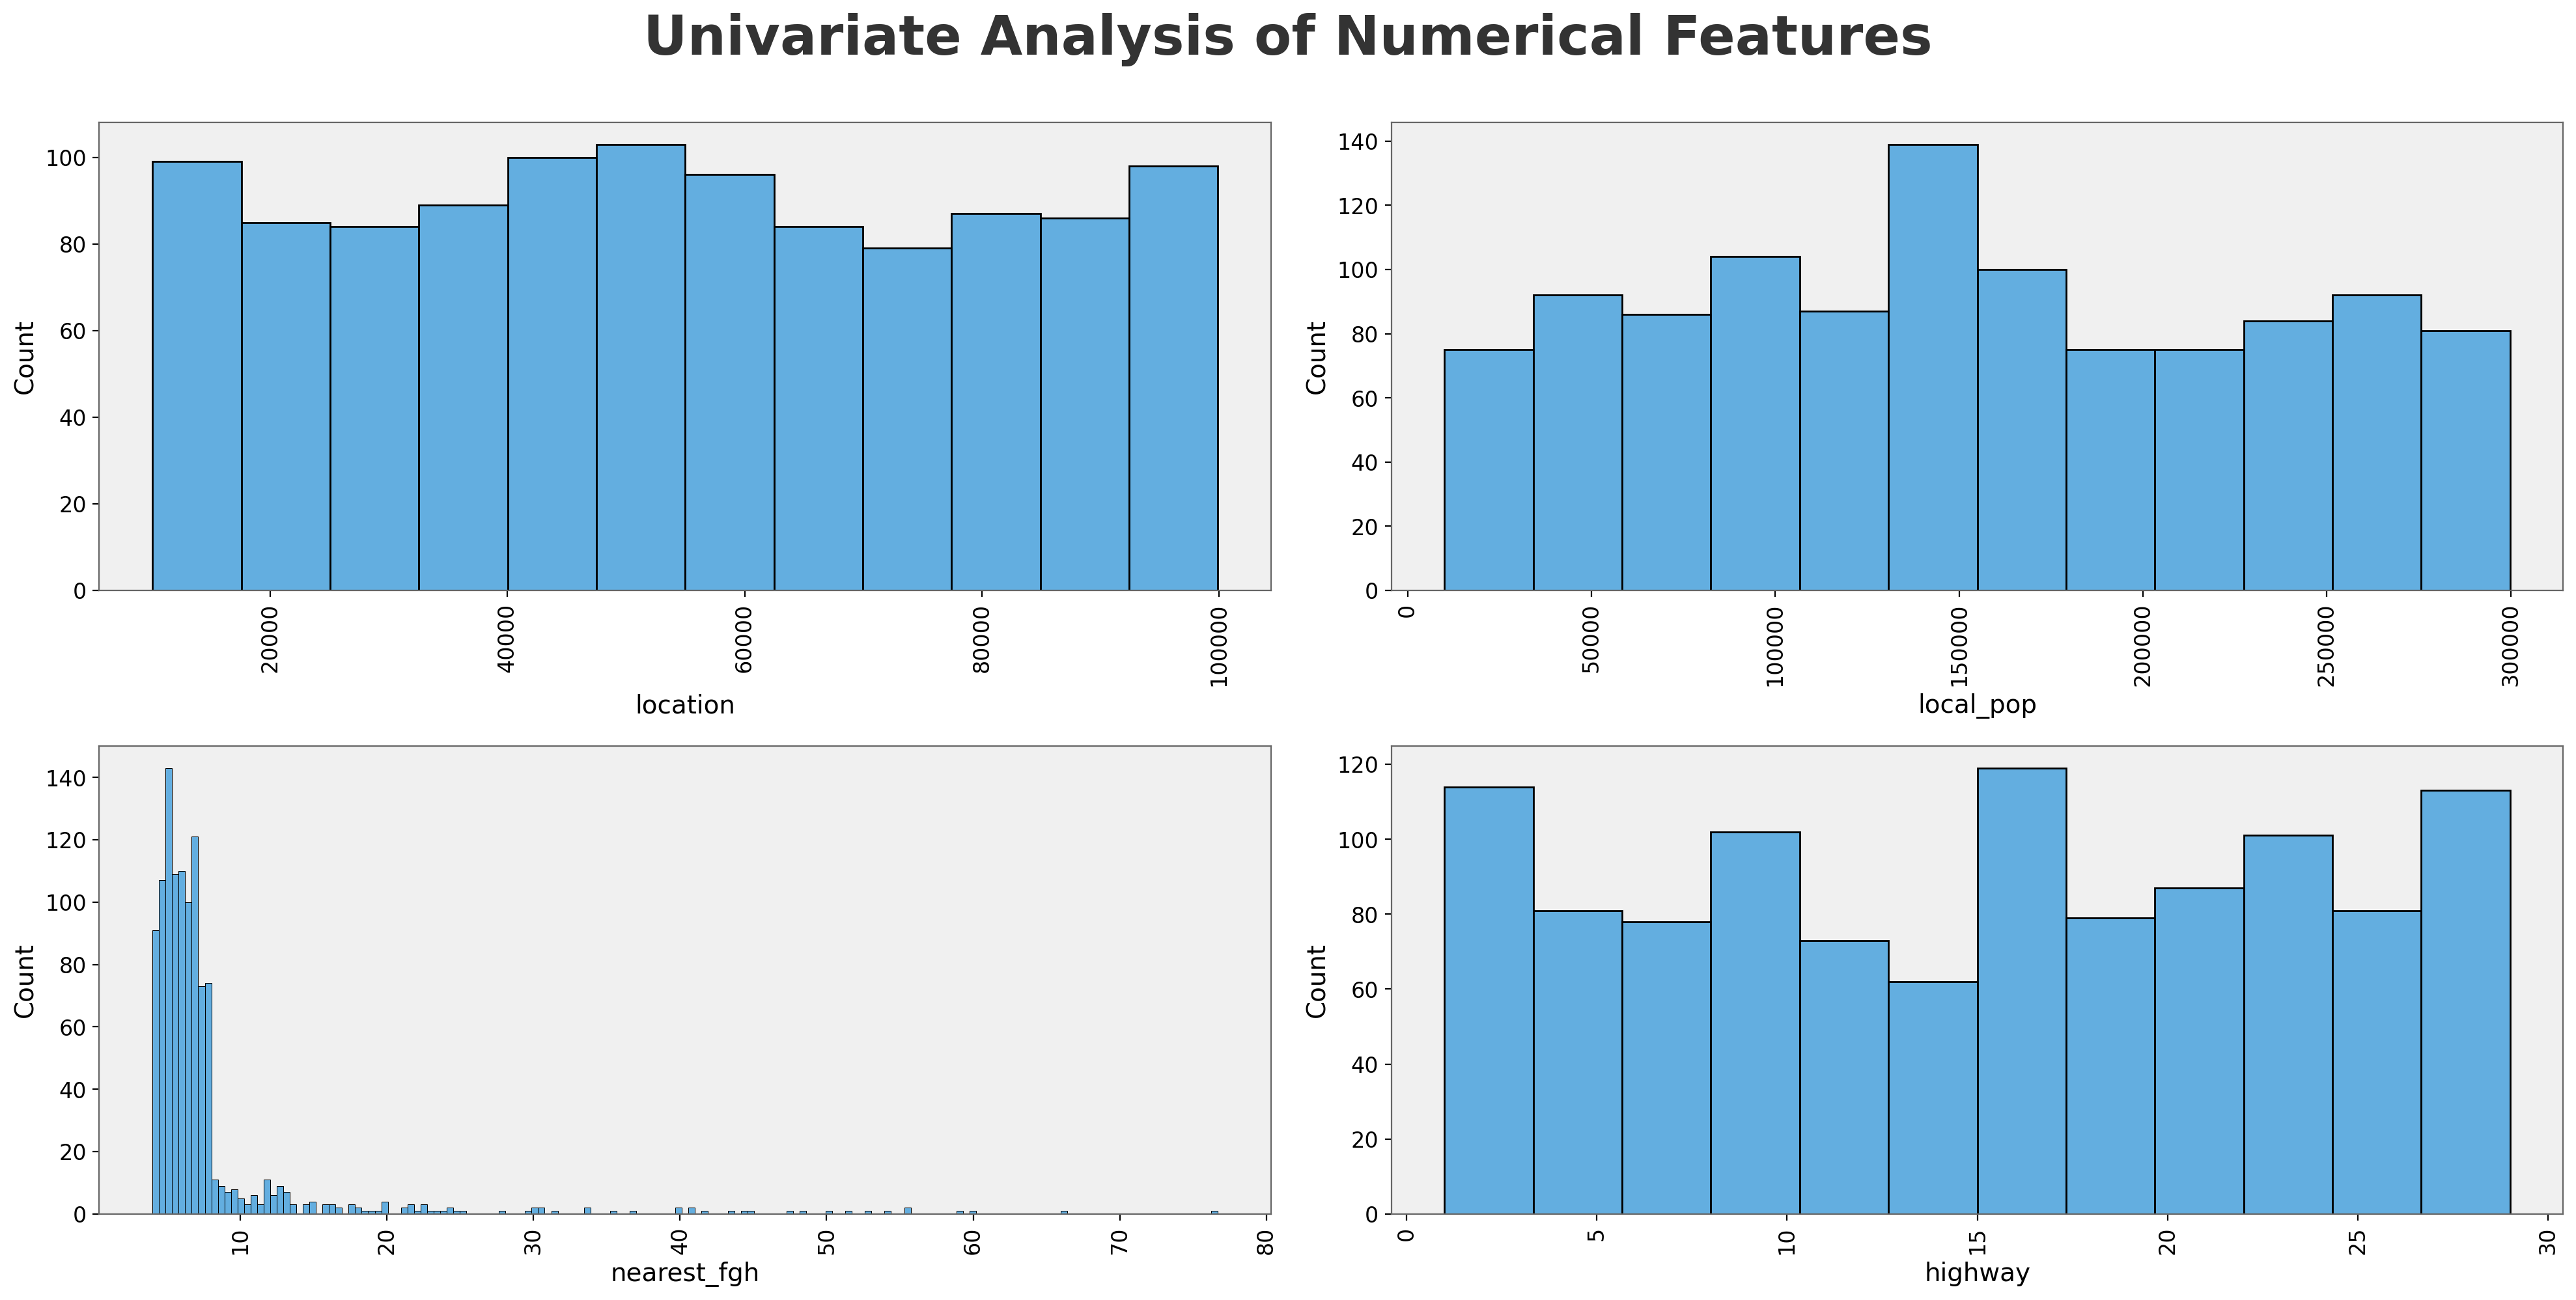

In [84]:
plt.figure(figsize=(20, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=30, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

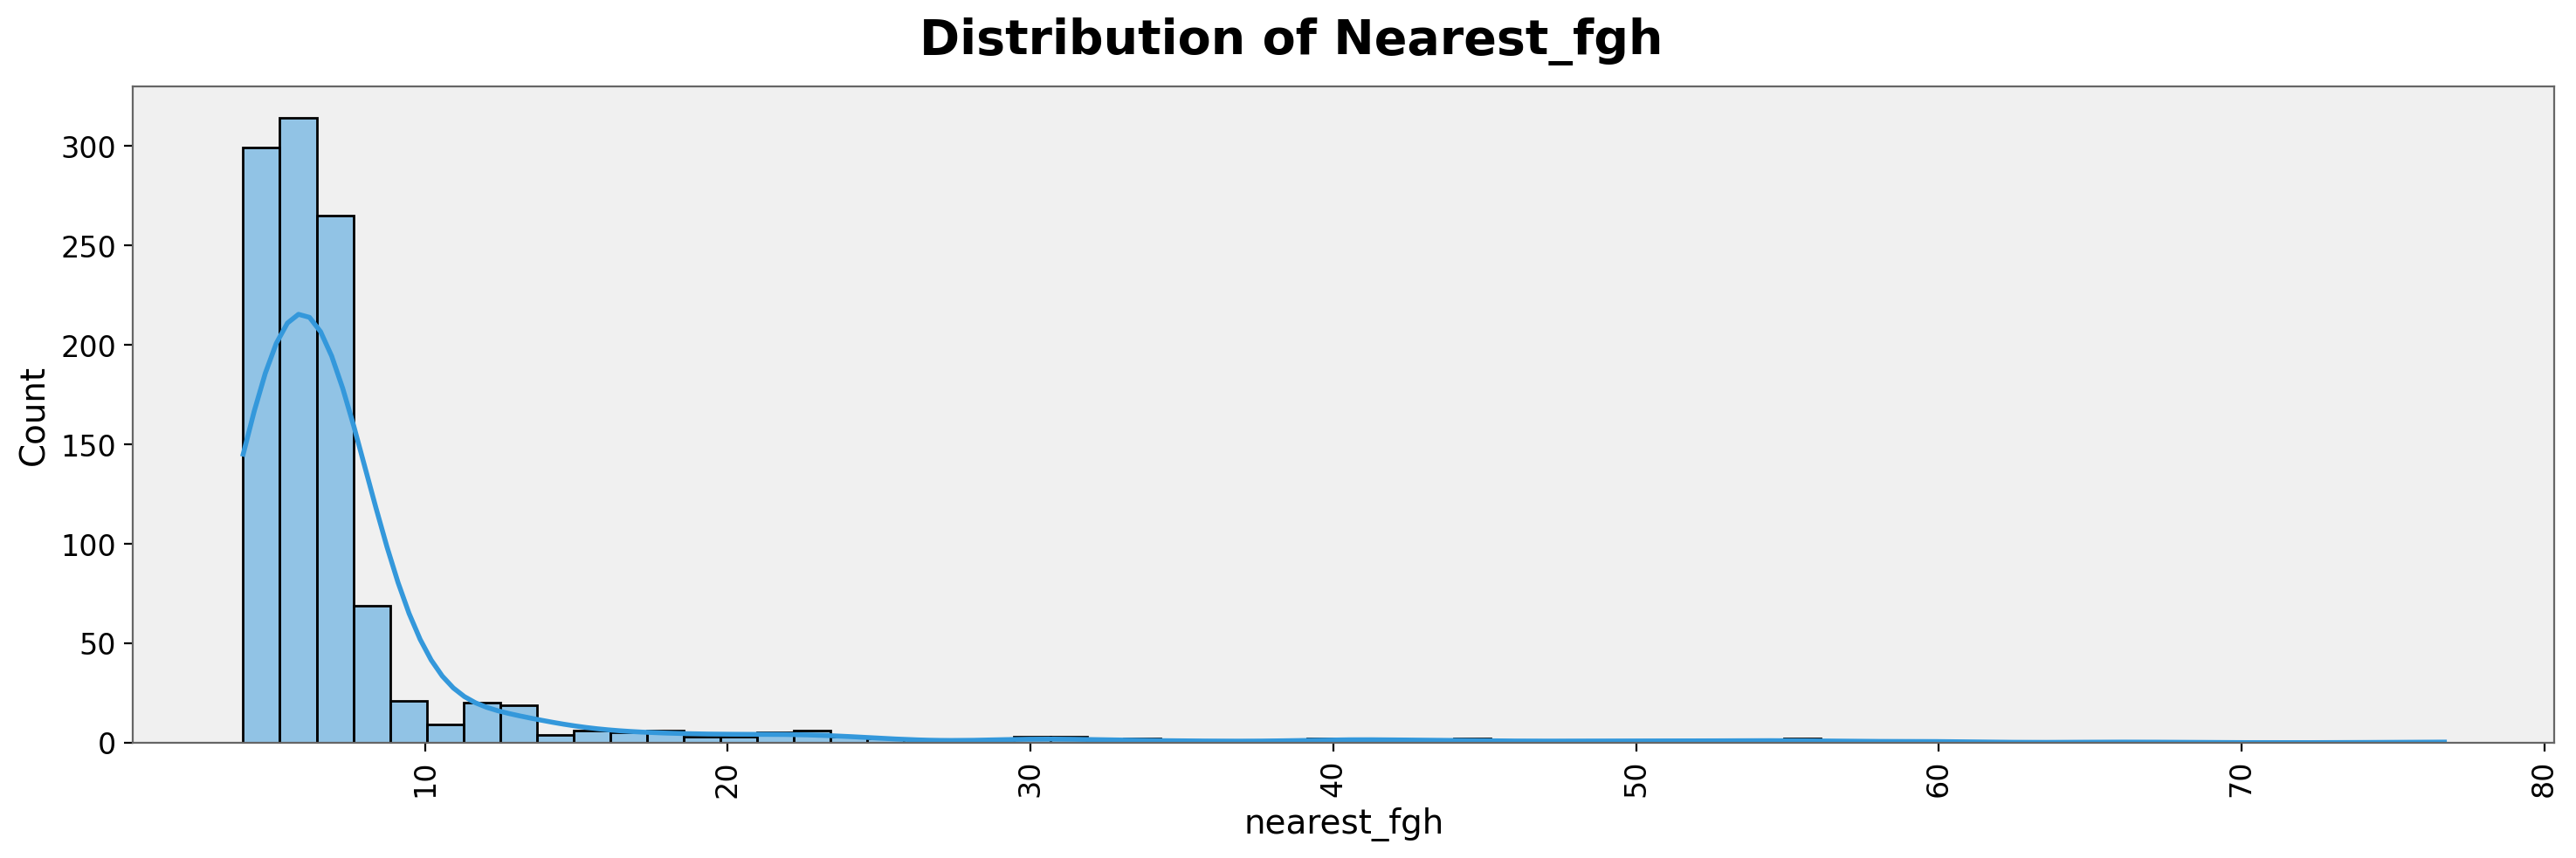

In [85]:
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle(f'Distribution of Nearest_fgh',fontsize=20, fontweight='bold', ha='center')
sns.histplot(data=df, x='nearest_fgh', bins=60, kde=True, 
                multiple='stack',ax=ax)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(rotation=90);

In [89]:
df[df['nearest_fgh']>60]

,location,year_3_profit,local_pop,competitors,nearest_fgh,hours,highway,drivethru
658,49493,1,11862,0,66.2,Extended,10,Yes
936,86670,1,10584,0,76.7,Not Known,21,Yes


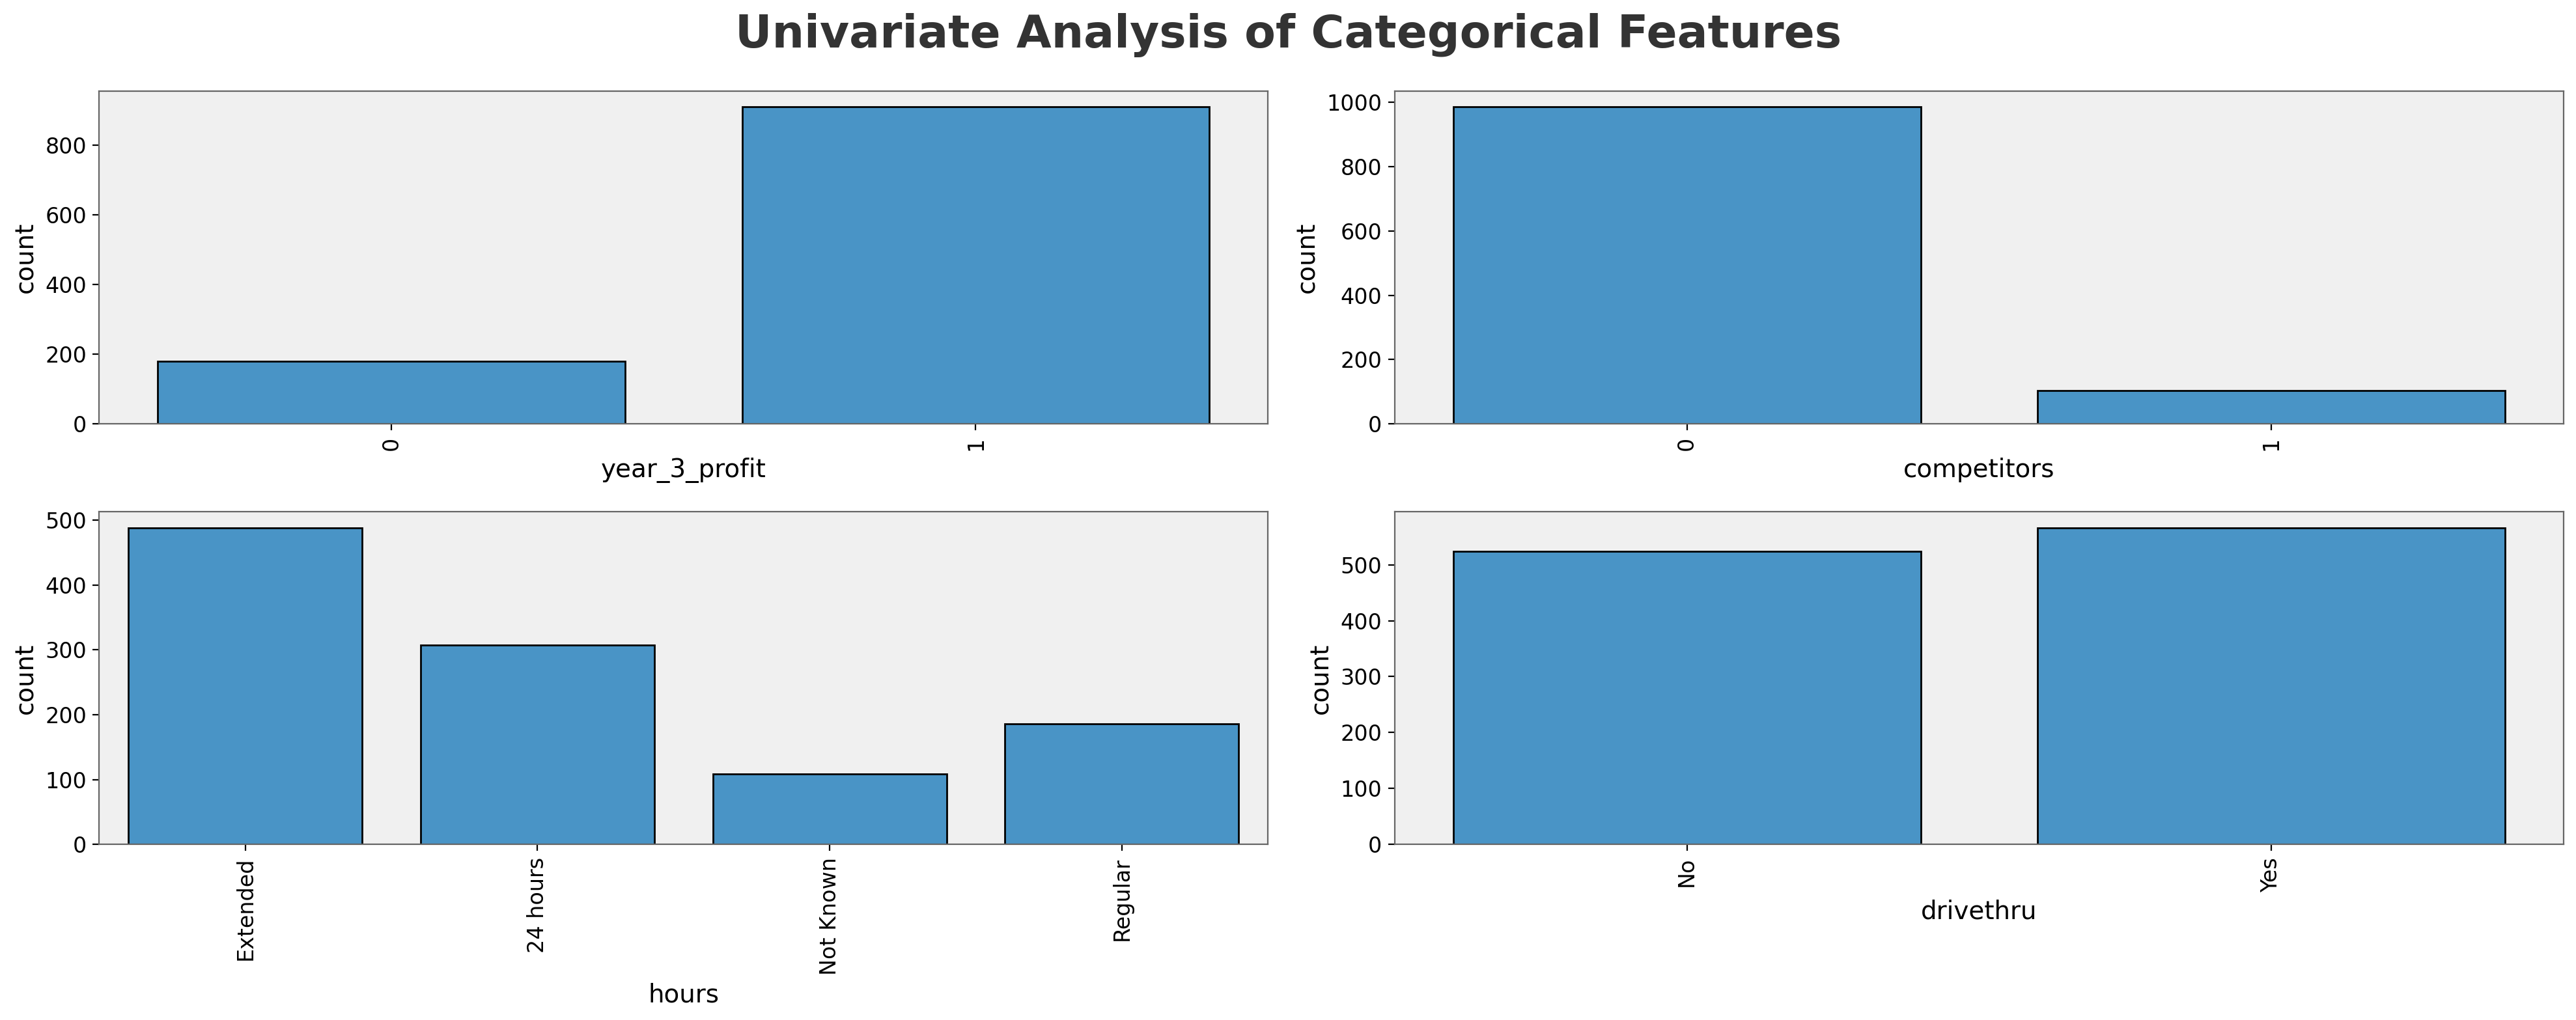

In [86]:
plt.figure(figsize=(20,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=25, fontweight='bold', alpha=0.8)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]],edgecolor='black')
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Check Multicollinearity for Categorical features

- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e `year_3_profit`

> Null Hypothesis (Ho): The Feature is independent of target column (No-Correlation)

> Alternative Hypothesis (H1): The Feature and Target column are not independent (Correalted)

In [91]:
import scipy.stats	
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['year_3_profit'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,year_3_profit,Reject Null Hypothesis
1,competitors,Fail to Reject Null Hypothesis
2,hours,Reject Null Hypothesis
3,drivethru,Reject Null Hypothesis


### Bivariate Analysis

In [96]:
numeric_features

['location', 'local_pop', 'nearest_fgh', 'highway']

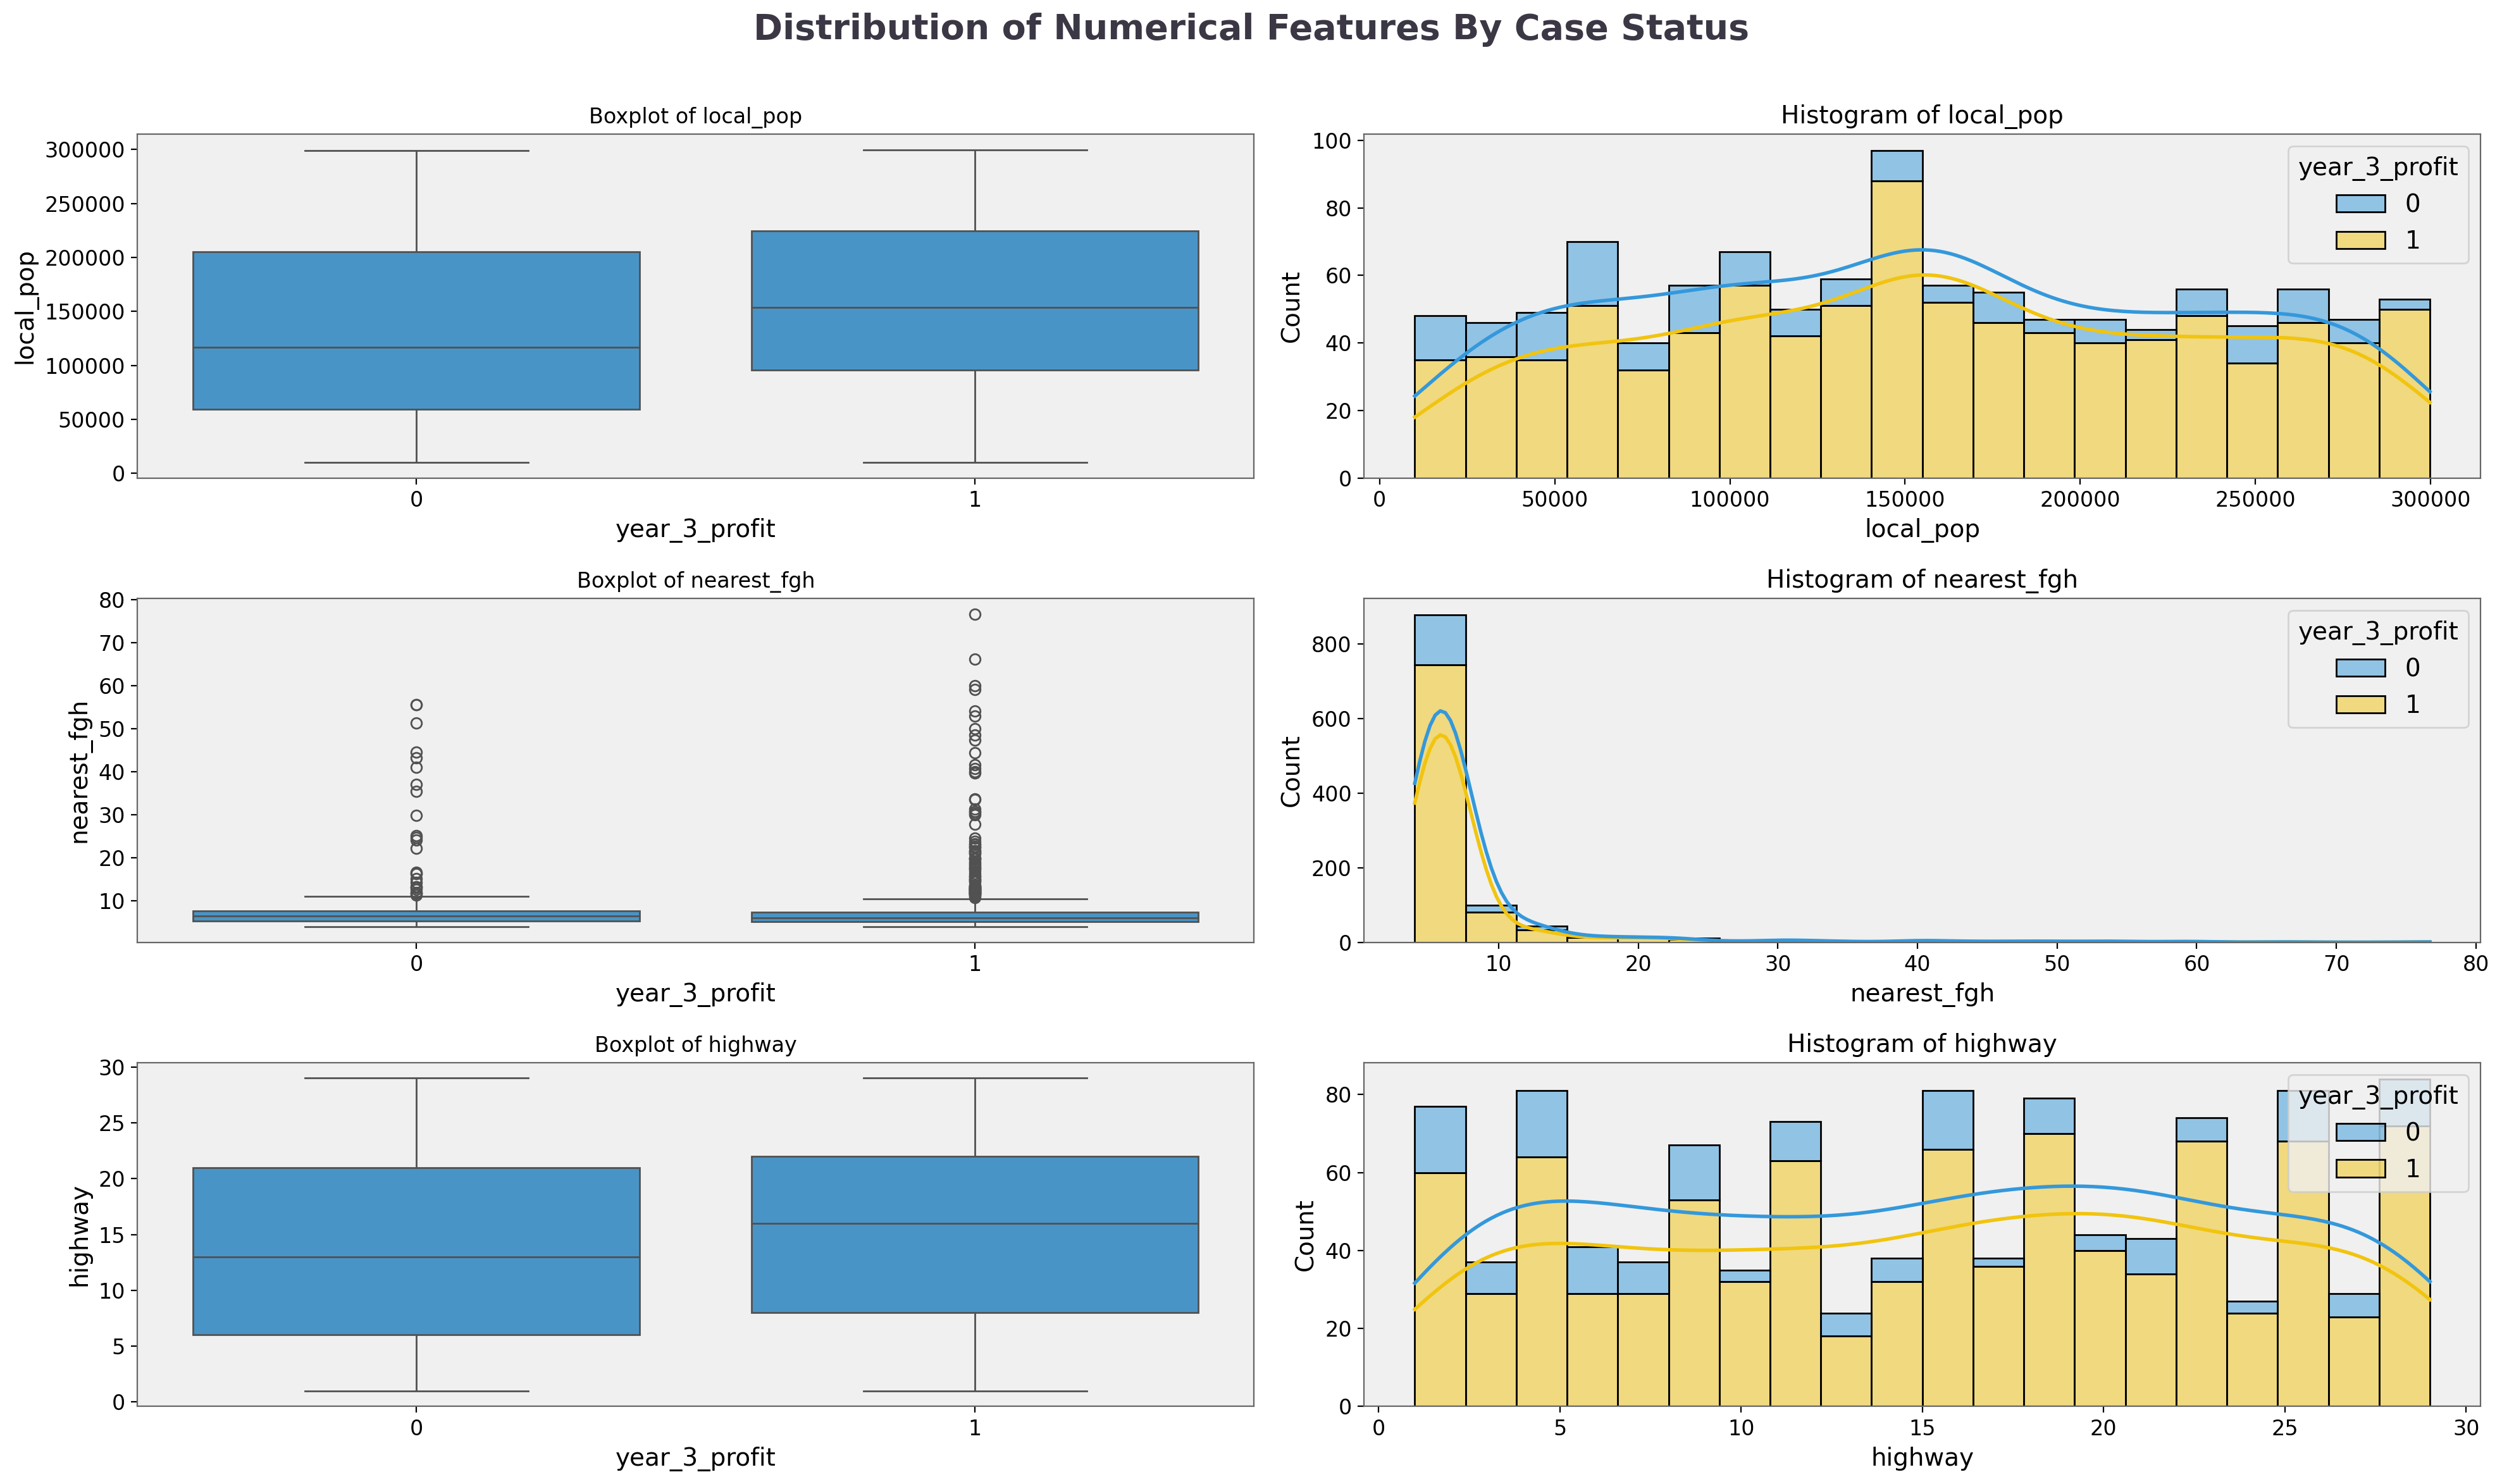

In [98]:
fig, ax = plt.subplots(3, 2, figsize=(20,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numeric_features[1:4]):   
    sns.boxplot(data=df, x='year_3_profit', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='year_3_profit', bins=20, kde=True, 
                 multiple='stack',  ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

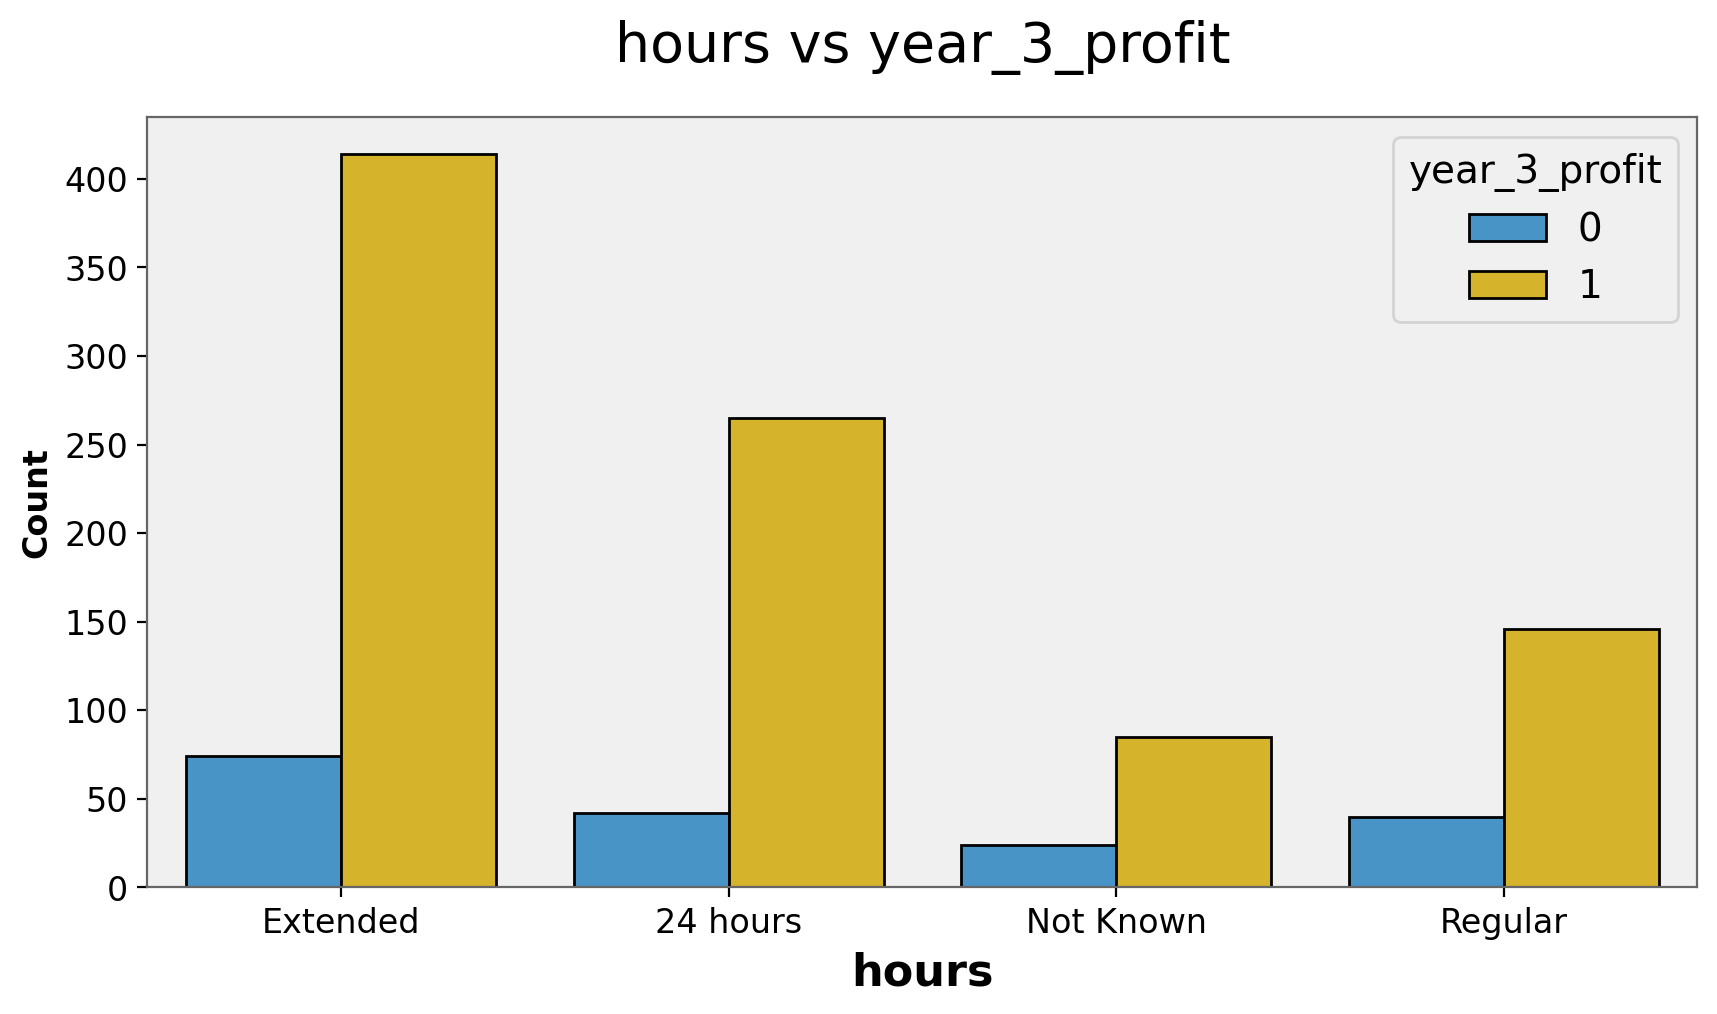

In [104]:
plt.subplots(figsize=(10,5))
sns.countplot(x="hours",hue="year_3_profit", data=df, ec = "black")
plt.title("hours vs year_3_profit", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("hours", weight="bold", fontsize=16)
plt.legend(title="year_3_profit", fancybox=True)
plt.show()

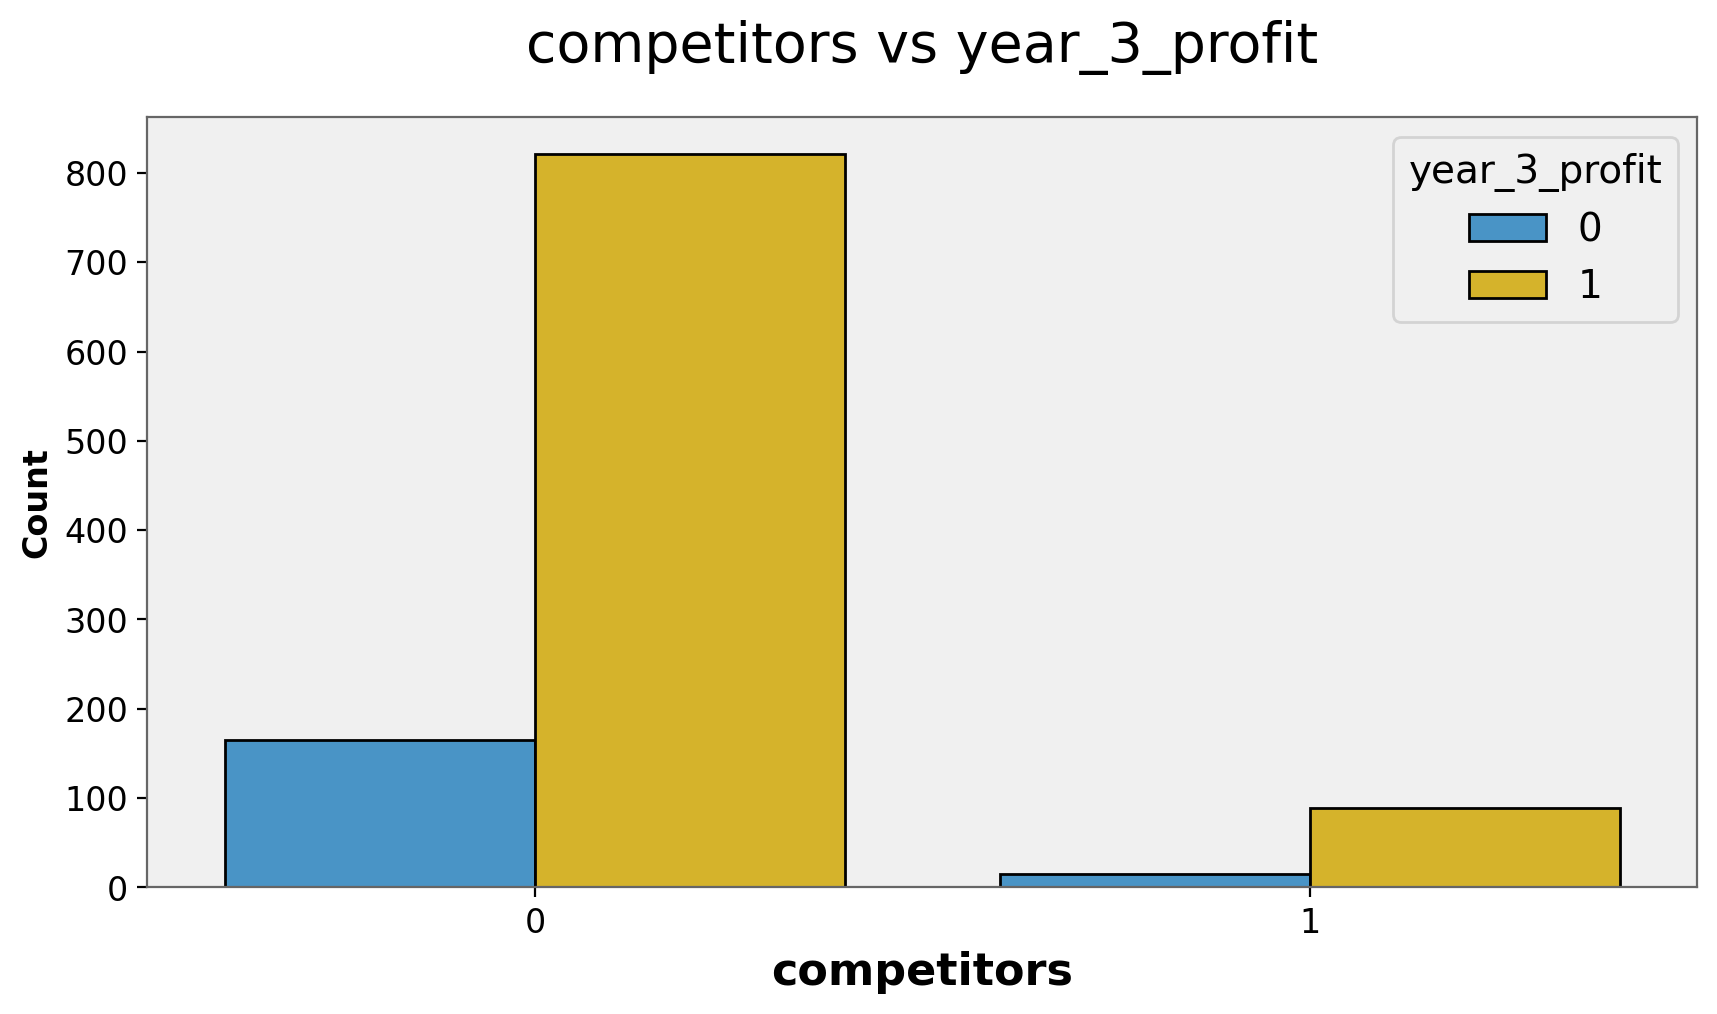

In [105]:
plt.subplots(figsize=(10,5))
sns.countplot(x="competitors",hue="year_3_profit", data=df, ec = "black")
plt.title("competitors vs year_3_profit", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("competitors", weight="bold", fontsize=16)
plt.legend(title="year_3_profit", fancybox=True)
plt.show()

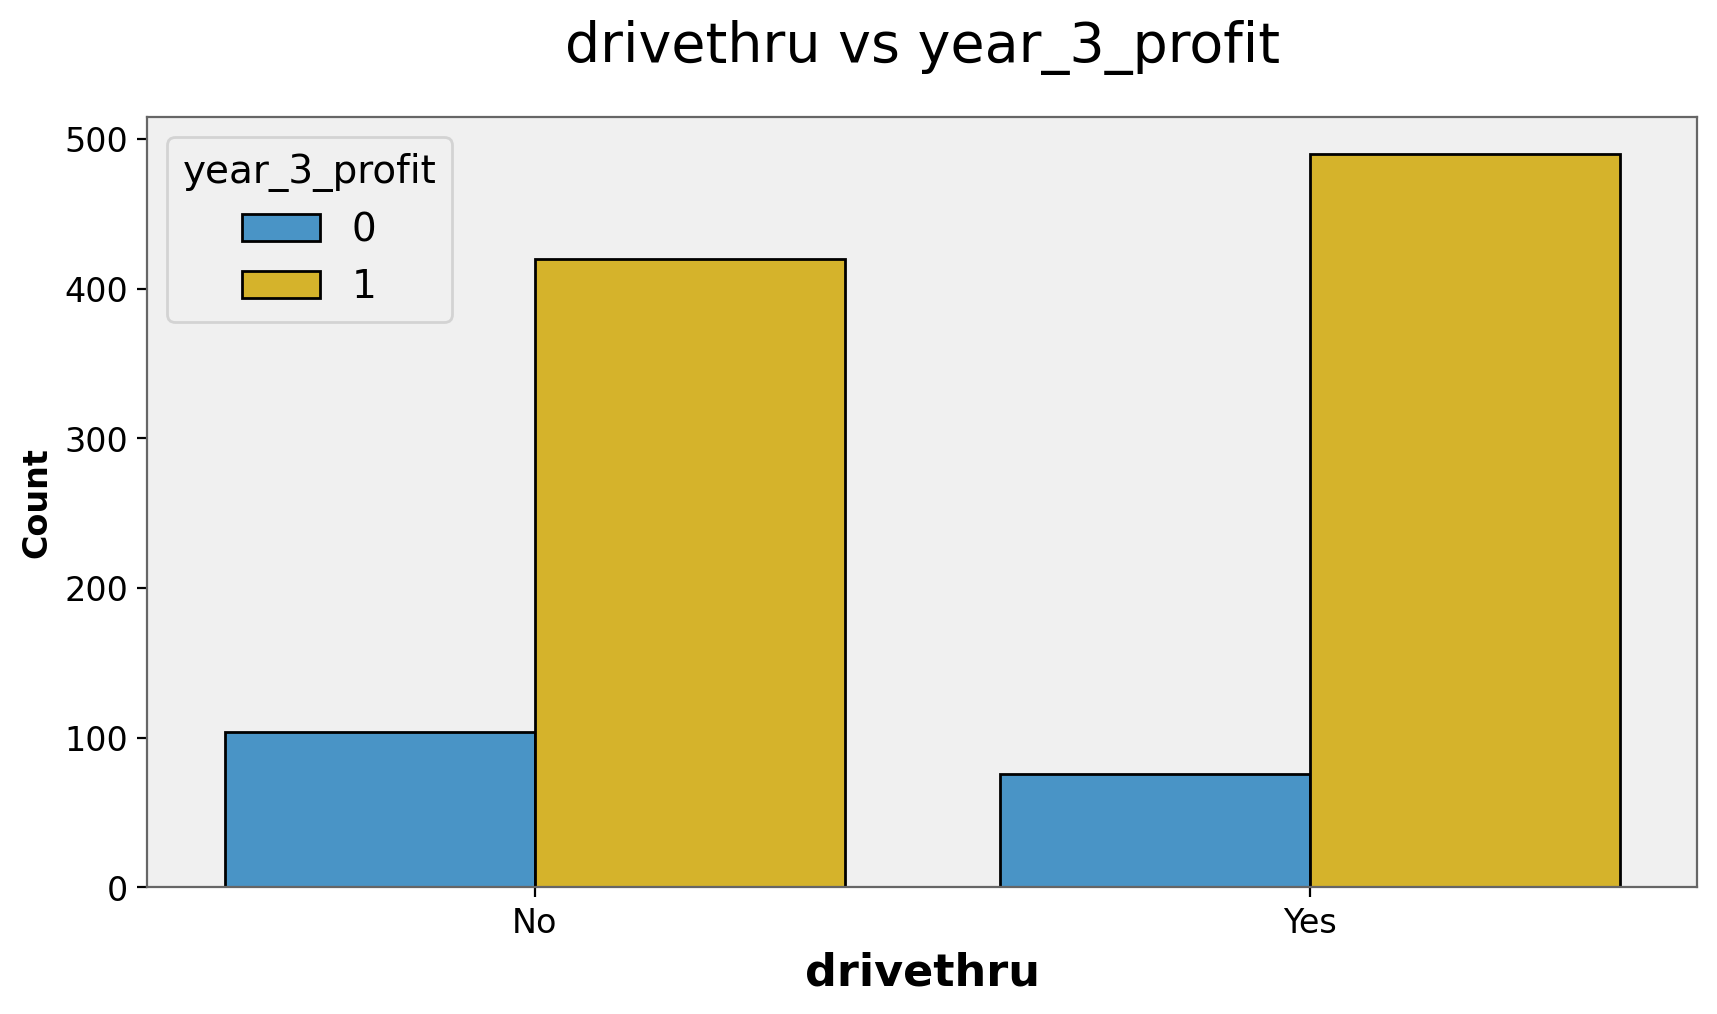

In [106]:
plt.subplots(figsize=(10,5))
sns.countplot(x="drivethru",hue="year_3_profit", data=df, ec = "black")
plt.title("drivethru vs year_3_profit", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("drivethru", weight="bold", fontsize=16)
plt.legend(title="year_3_profit", fancybox=True)
plt.show()

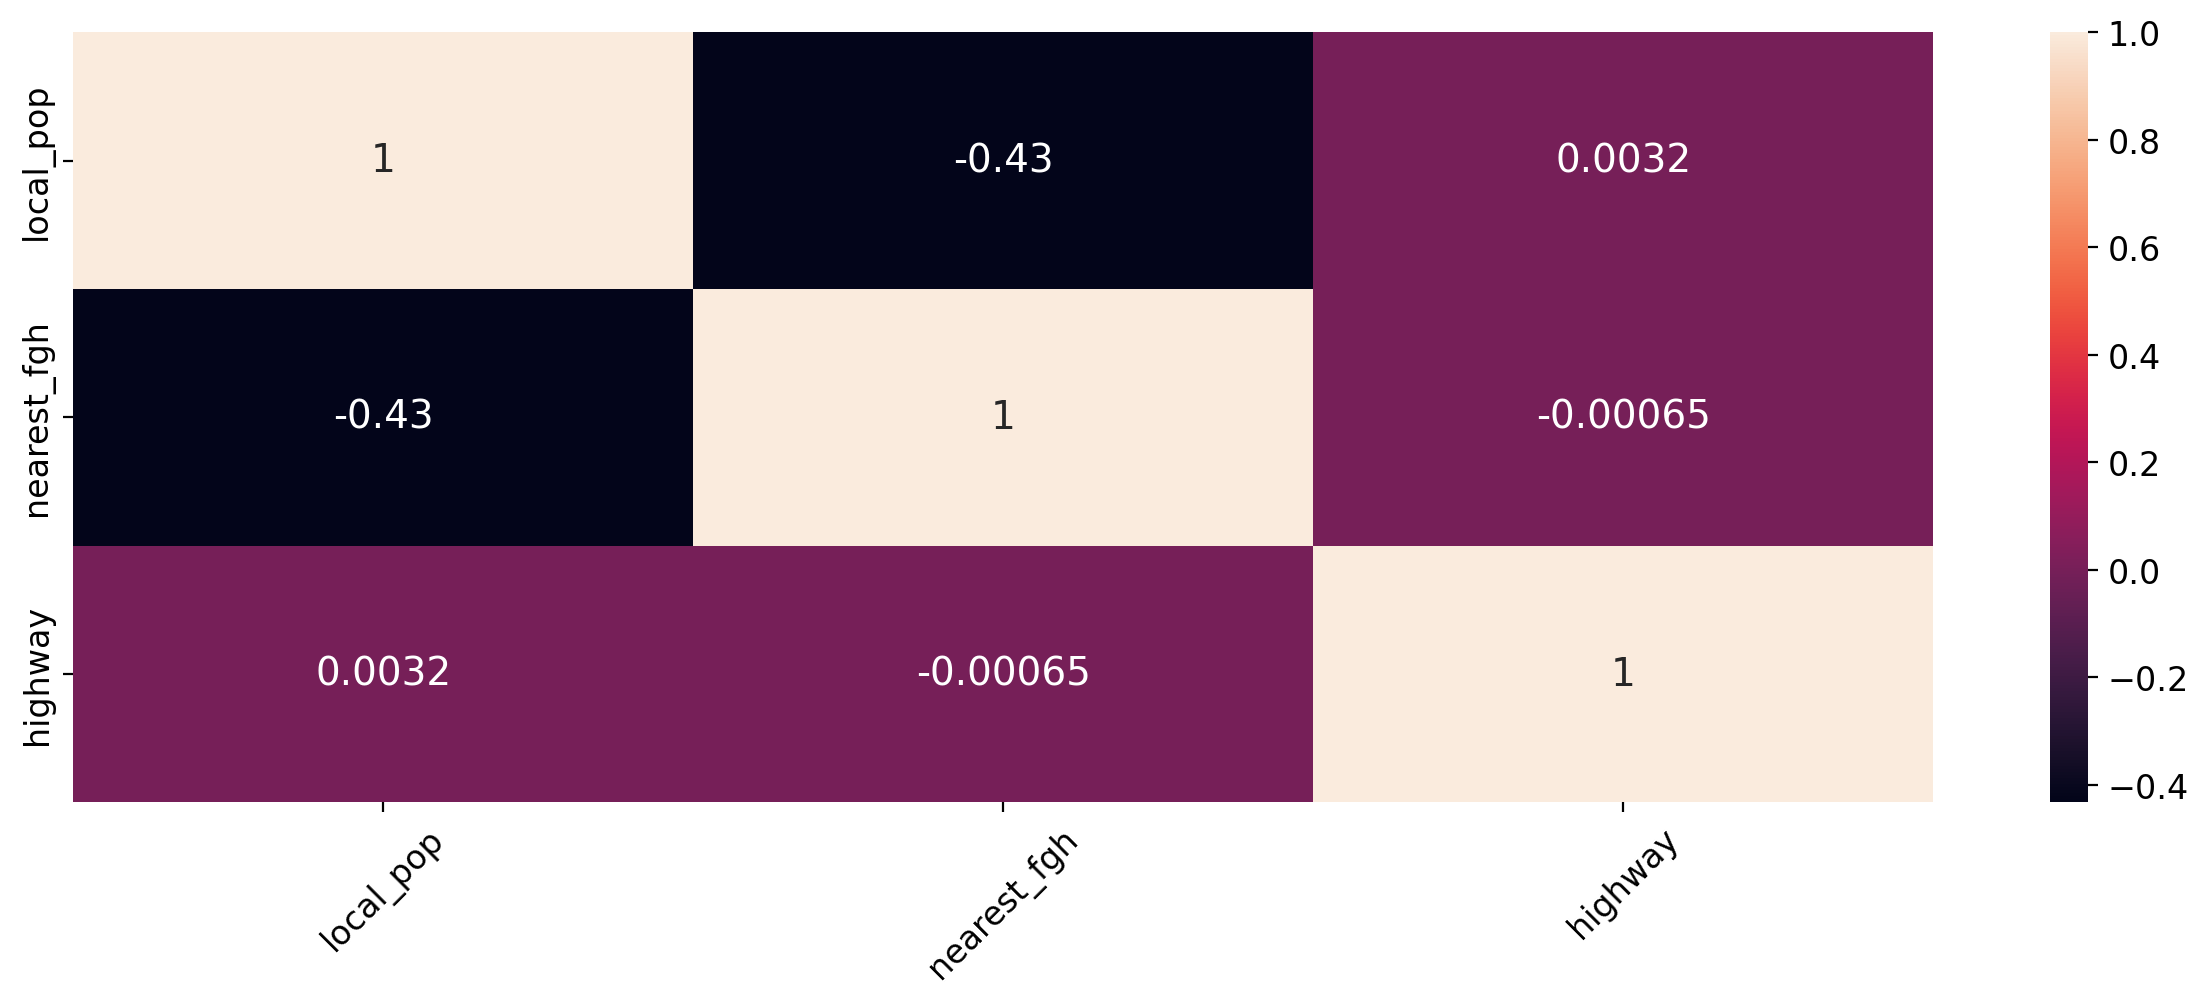

In [112]:
features = numeric_features[1:4]
fig = plt.figure(figsize=(15, 5))
#features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(df[features].corr(),ec='black', annot=True)
plt.xticks(rotation=45)
plt.show()

#### Target Variable

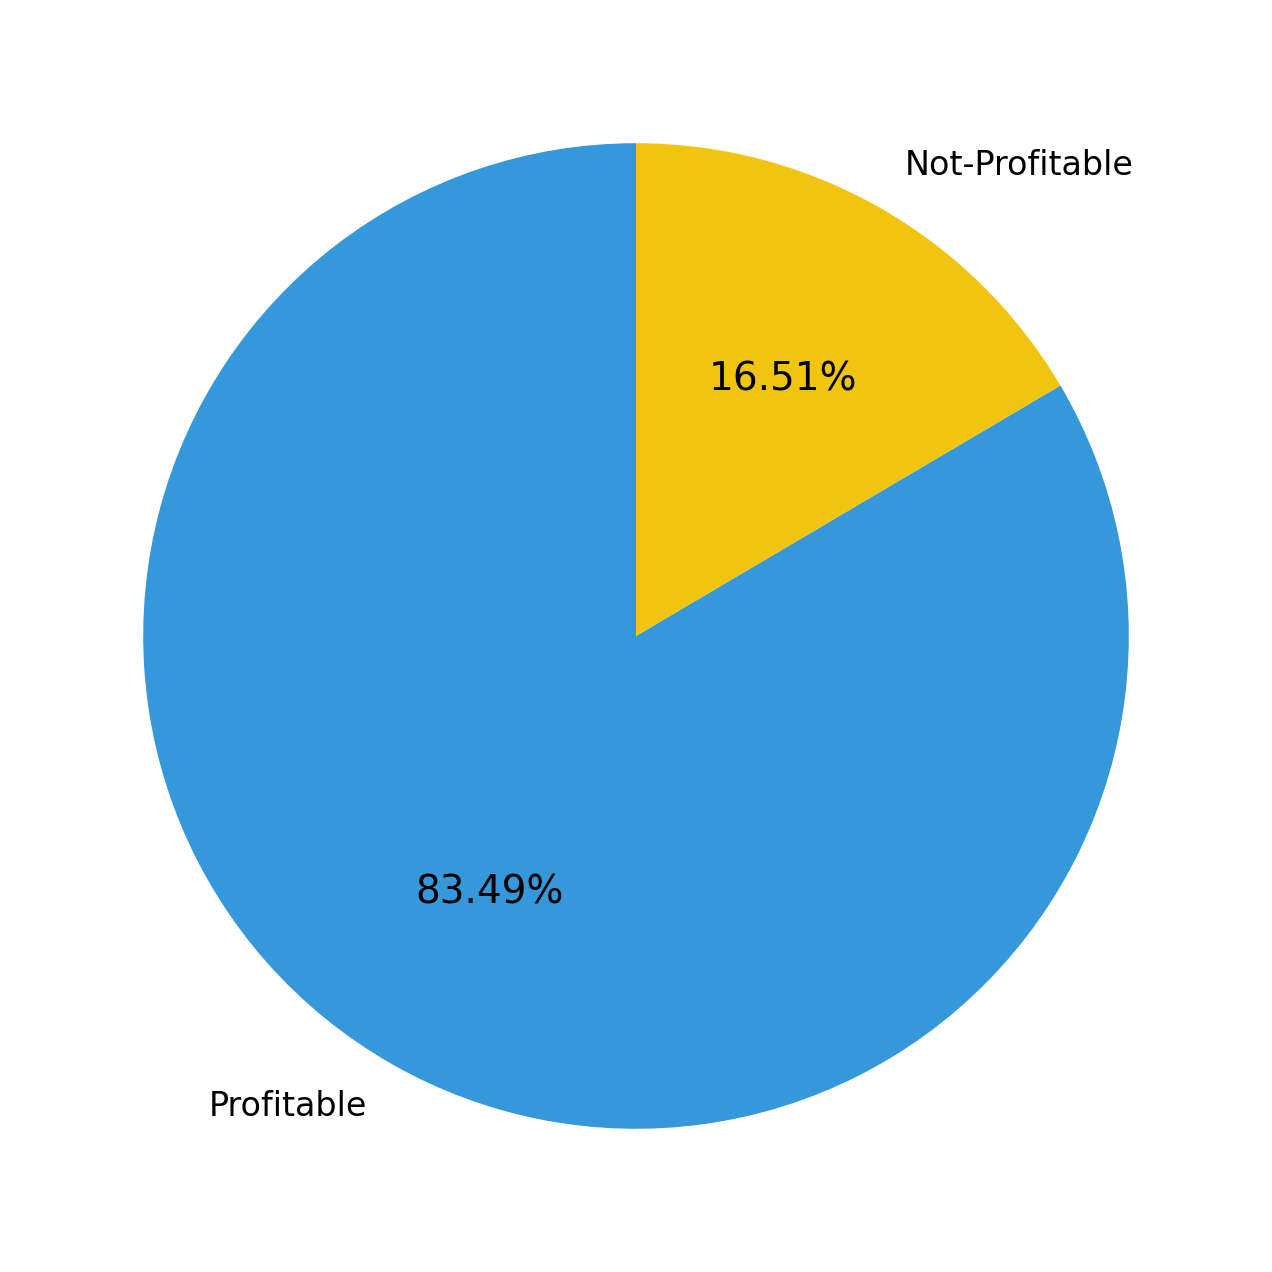

In [114]:
percentage = df.year_3_profit.value_counts(normalize=True)*100
labels = ["Profitable","Not-Profitable"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
#colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%')
plt.show()